In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 15.9 MB/s eta 0:00:00a 0:00:01


In [2]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')


image = cv2.imread("/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/1-1_jpg.rf.3c35c15f5361d33821647bfd181b0af7.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
The image has dimensions 416x416 and 3 channels.


# YOLOv8 configuration

100%|██████████| 6.25M/6.25M [00:00<00:00, 66.3MB/s]



image 1/1 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/1-1_jpg.rf.3c35c15f5361d33821647bfd181b0af7.jpg: 640x640 1 person, 7.4ms
Speed: 13.8ms preprocess, 7.4ms inference, 251.0ms postprocess per image at shape (1, 3, 640, 640)


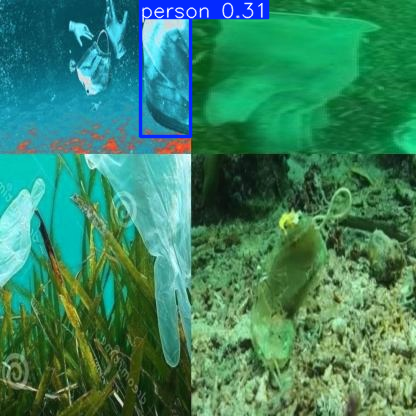

In [3]:
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/1-1_jpg.rf.3c35c15f5361d33821647bfd181b0af7.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

# Fine-tuning process log of YOLOv8

In [4]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data="/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/data.yaml",epochs=25, imgsz = 640, batch = 16 ,lr0=0.01, dropout= 0.15, device = 0)

Transferred 355/355 items from pretrained weights
Ultralytics 8.3.58 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=yolov8n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fa

100%|██████████| 755k/755k [00:00<00:00, 43.3MB/s]
2025-01-07 18:36:14,720	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-01-07 18:36:15,204	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 174MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/labels... 3628 images, 2 backgrounds, 0 corrupt: 100%|██████████| 3628/3628 [00:22<00:00, 164.28it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/valid/labels... 1001 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [00:05<00:00, 182.74it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.44G      1.461      3.367      1.622         37        640: 100%|██████████| 227/227 [00:44<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.62it/s]


                   all       1001       1891      0.483      0.219      0.162      0.098

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.34G      1.442      2.558      1.599         40        640: 100%|██████████| 227/227 [00:41<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.57it/s]


                   all       1001       1891      0.664      0.188      0.207      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.34G      1.454      2.315      1.586         68        640: 100%|██████████| 227/227 [00:41<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.54it/s]


                   all       1001       1891      0.612      0.219      0.225      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.34G      1.434      2.145      1.559         52        640: 100%|██████████| 227/227 [00:41<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.45it/s]


                   all       1001       1891      0.693      0.296      0.318      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.34G      1.409       2.01      1.543         36        640: 100%|██████████| 227/227 [00:41<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.51it/s]


                   all       1001       1891      0.735      0.289      0.339      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.34G      1.404      1.924      1.534         63        640: 100%|██████████| 227/227 [00:41<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.60it/s]

                   all       1001       1891      0.687      0.271      0.282      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.46G       1.35      1.787      1.495         57        640: 100%|██████████| 227/227 [00:40<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.66it/s]

                   all       1001       1891      0.811      0.358      0.403      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.46G      1.334      1.714      1.483         59        640: 100%|██████████| 227/227 [00:41<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.56it/s]

                   all       1001       1891      0.825       0.32      0.394      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.34G      1.316       1.66      1.471         90        640: 100%|██████████| 227/227 [00:40<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.55it/s]

                   all       1001       1891      0.758      0.366      0.388       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.34G      1.304      1.574      1.451         56        640: 100%|██████████| 227/227 [00:41<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.62it/s]

                   all       1001       1891      0.525      0.368      0.387       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       2.4G       1.27      1.539      1.442         34        640: 100%|██████████| 227/227 [00:41<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.44it/s]

                   all       1001       1891       0.63      0.423       0.44      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.34G      1.263      1.483      1.437         37        640: 100%|██████████| 227/227 [00:41<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.53it/s]

                   all       1001       1891      0.626      0.397       0.44      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.46G      1.241      1.425      1.411         41        640: 100%|██████████| 227/227 [00:40<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.69it/s]

                   all       1001       1891      0.601      0.458      0.482      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.34G       1.24      1.394      1.412         28        640: 100%|██████████| 227/227 [00:40<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.45it/s]

                   all       1001       1891      0.684      0.423      0.472      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25       2.4G      1.234       1.36      1.407         60        640: 100%|██████████| 227/227 [00:40<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.69it/s]

                   all       1001       1891      0.555      0.462      0.481      0.314


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.34G      1.198      1.232      1.426         27        640: 100%|██████████| 227/227 [00:41<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.39it/s]

                   all       1001       1891      0.724      0.448      0.506      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.34G      1.164      1.143      1.403         40        640: 100%|██████████| 227/227 [00:40<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.59it/s]

                   all       1001       1891      0.757      0.454      0.527      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.34G      1.135      1.093      1.382         36        640: 100%|██████████| 227/227 [00:40<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.48it/s]

                   all       1001       1891      0.556      0.496      0.535      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.34G      1.123      1.041      1.365         28        640: 100%|██████████| 227/227 [00:40<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.73it/s]

                   all       1001       1891      0.712      0.464      0.538      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.34G      1.106          1      1.356         43        640: 100%|██████████| 227/227 [00:40<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.75it/s]

                   all       1001       1891      0.593      0.605      0.615      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.34G      1.102     0.9832      1.355         15        640: 100%|██████████| 227/227 [00:40<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.72it/s]

                   all       1001       1891      0.576      0.591      0.594      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.46G      1.079     0.9429      1.333         36        640: 100%|██████████| 227/227 [00:40<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.71it/s]

                   all       1001       1891      0.684      0.555       0.61      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.46G      1.064     0.9093      1.324         18        640: 100%|██████████| 227/227 [00:40<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.74it/s]

                   all       1001       1891      0.577      0.643      0.619      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.46G      1.051     0.8916      1.312         20        640: 100%|██████████| 227/227 [00:40<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.52it/s]

                   all       1001       1891      0.587        0.6       0.61      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.34G      1.038     0.8606      1.304         36        640: 100%|██████████| 227/227 [00:40<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.49it/s]

                   all       1001       1891        0.6      0.602      0.617        0.4



25 epochs completed in 0.331 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.79it/s]


                   all       1001       1891      0.598      0.602      0.617        0.4
                  Mask         77         90      0.927      0.564      0.781      0.551
                   can         18         20      0.493      0.536      0.506      0.189
             cellphone         61         71      0.917      0.986      0.988      0.876
           electronics         27         40      0.507        0.7      0.675      0.351
               gbottle         36         82      0.515      0.768       0.74      0.516
                 glove         37         55      0.864      0.808      0.868      0.693
                 metal         10         22      0.395      0.182      0.222      0.137
                  misc         48         51      0.496      0.412      0.434      0.284
                   net        146        148      0.741      0.831      0.863      0.586
                  pbag        290        330      0.806      0.933      0.947        0.8
               pbottl

# Training performance metrics

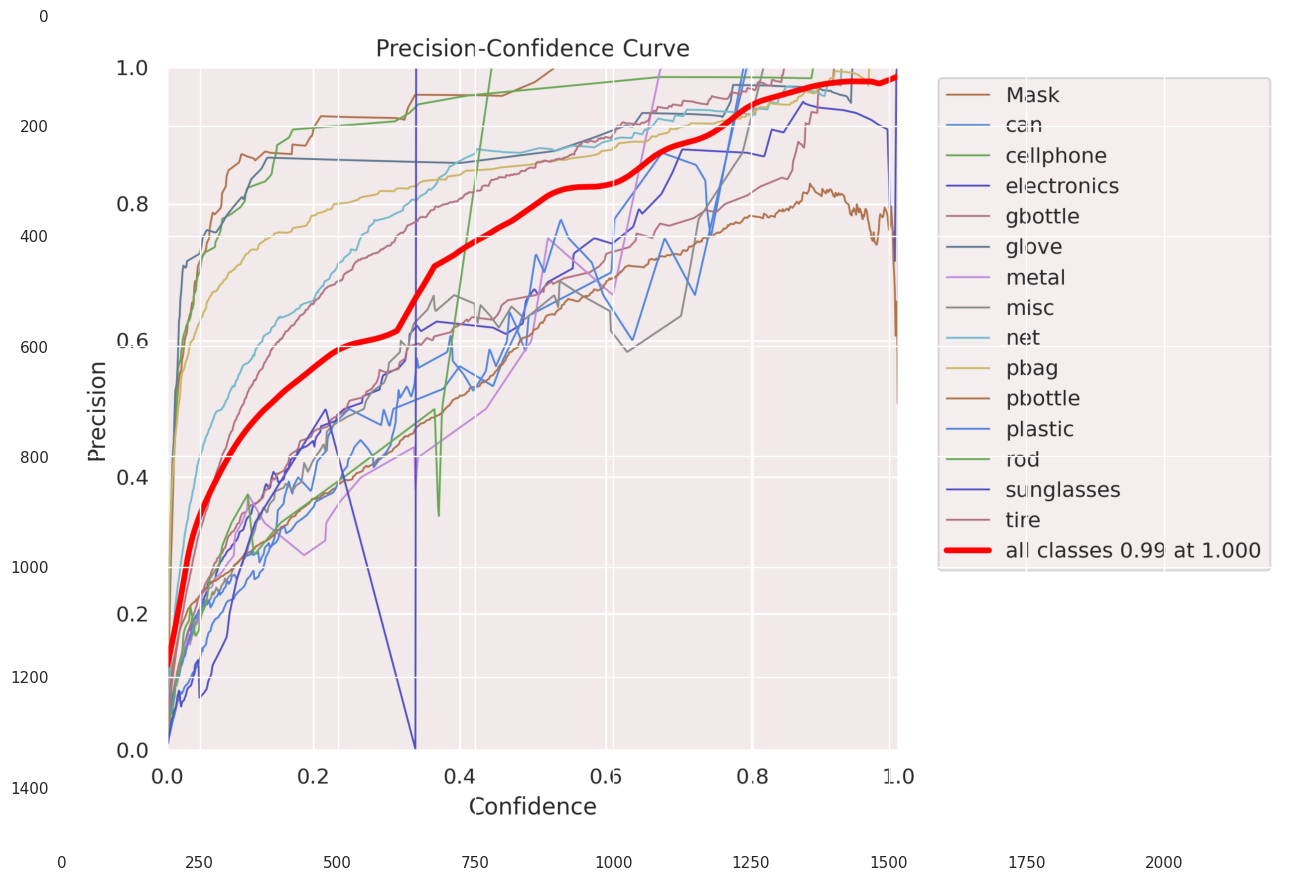

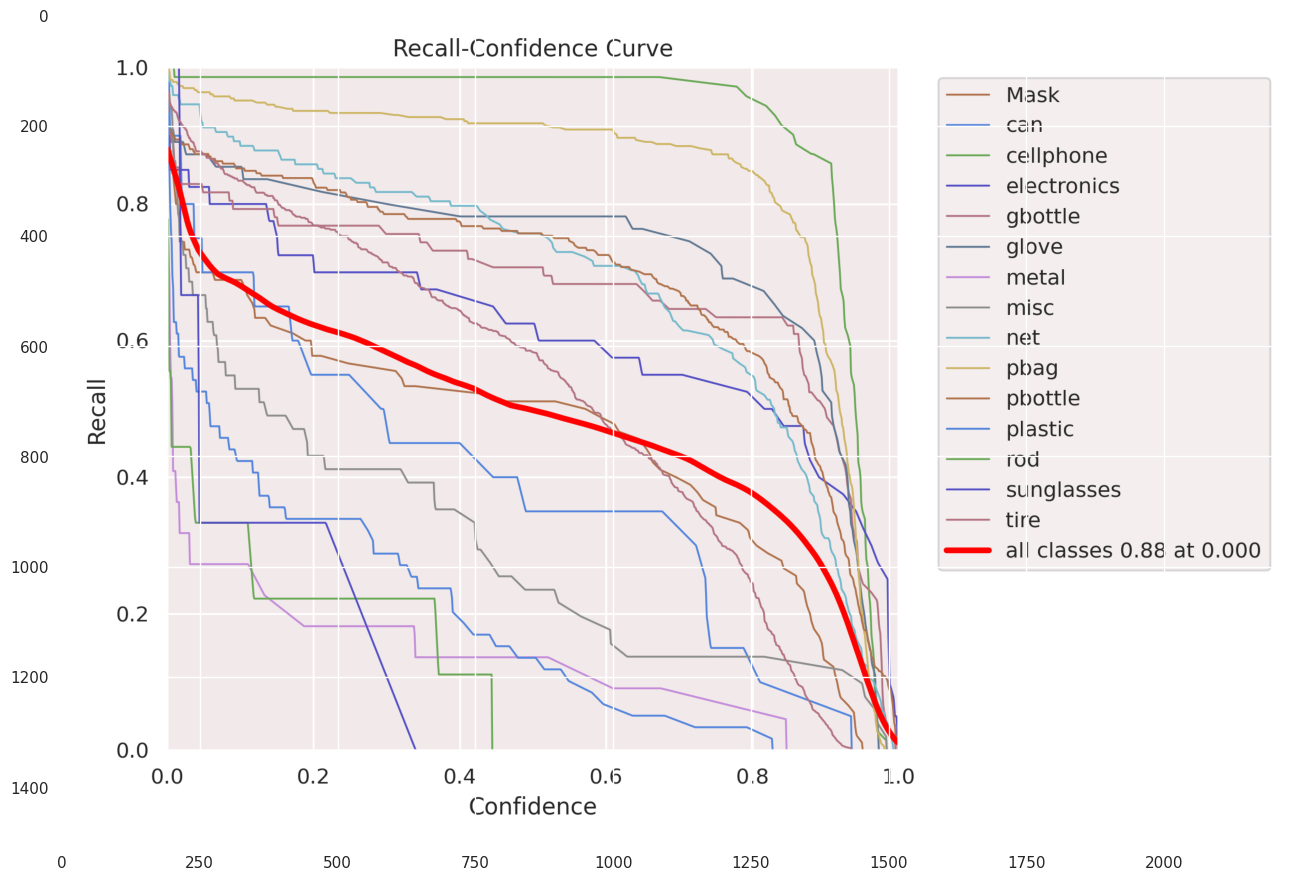

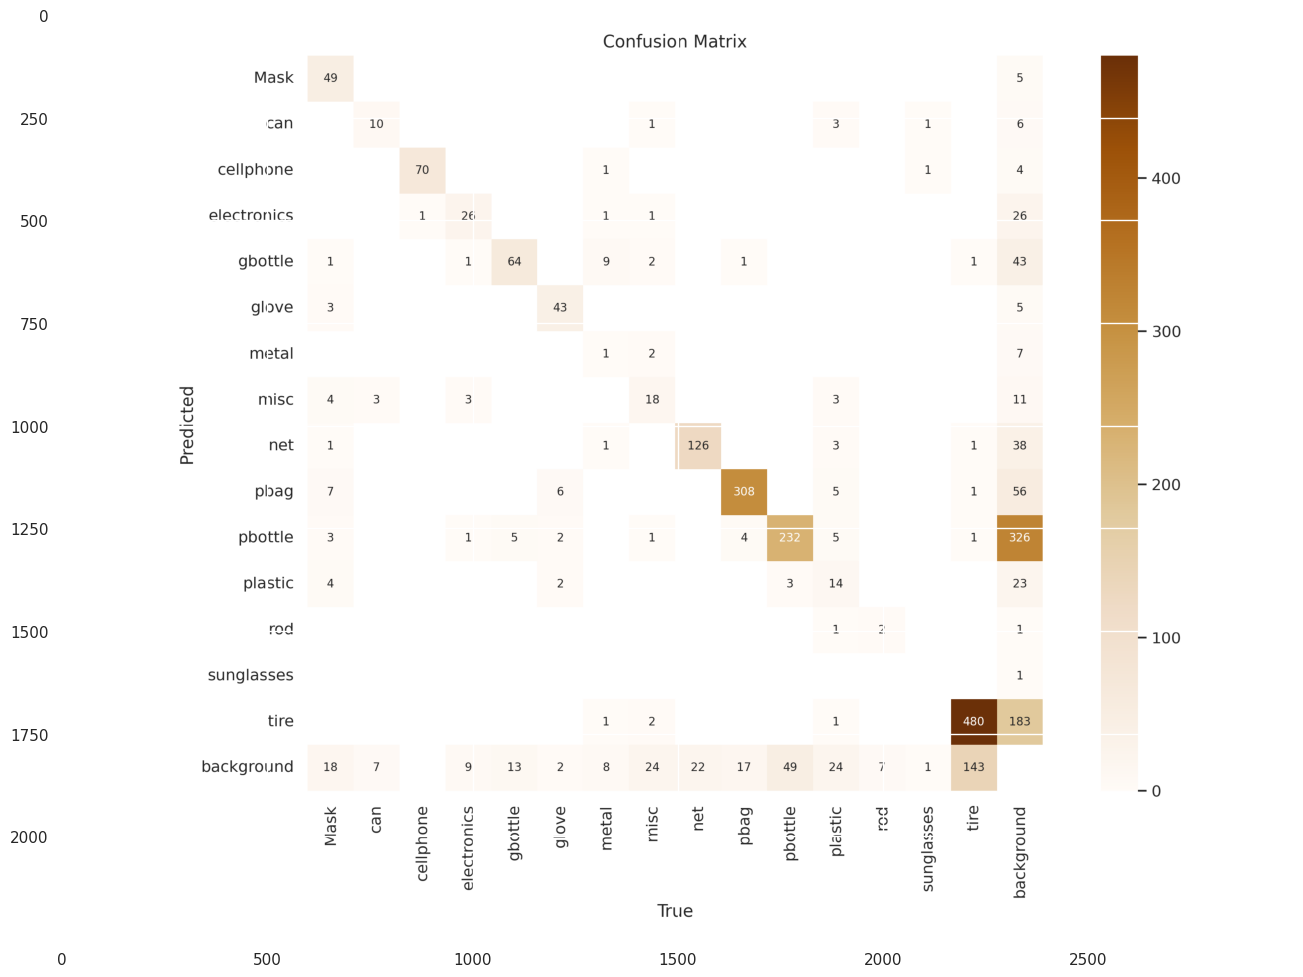

In [5]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]
for i in list_of_metrics:
    img = cv2.imread(f"/kaggle/working/runs/detect/train/{i}")
    plt.figure(figsize = (16, 12))
    plt.imshow(np.array(img))
    plt.show()

In [6]:
results = pd.read_csv("/kaggle/working/runs/detect/train/results.csv")
results.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,54.6384,1.46110,3.36653,1.62244,0.48337,0.21927,0.16158,0.09802,1.45933,2.80310,1.80980,0.000175,0.000175,0.000175
1,2,103.3220,1.44192,2.55769,1.59884,0.66418,0.18770,0.20725,0.12518,1.48724,2.28725,1.84552,0.000336,0.000336,0.000336
2,3,151.2130,1.45445,2.31510,1.58635,0.61229,0.21891,0.22538,0.12808,1.51268,2.34969,1.83654,0.000484,0.000484,0.000484
3,4,198.9610,1.43354,2.14454,1.55941,0.69268,0.29606,0.31834,0.19072,1.48721,1.93783,1.78840,0.000464,0.000464,0.000464
4,5,246.6590,1.40949,2.00971,1.54271,0.73541,0.28893,0.33946,0.20879,1.48252,2.06152,1.81191,0.000443,0.000443,0.000443


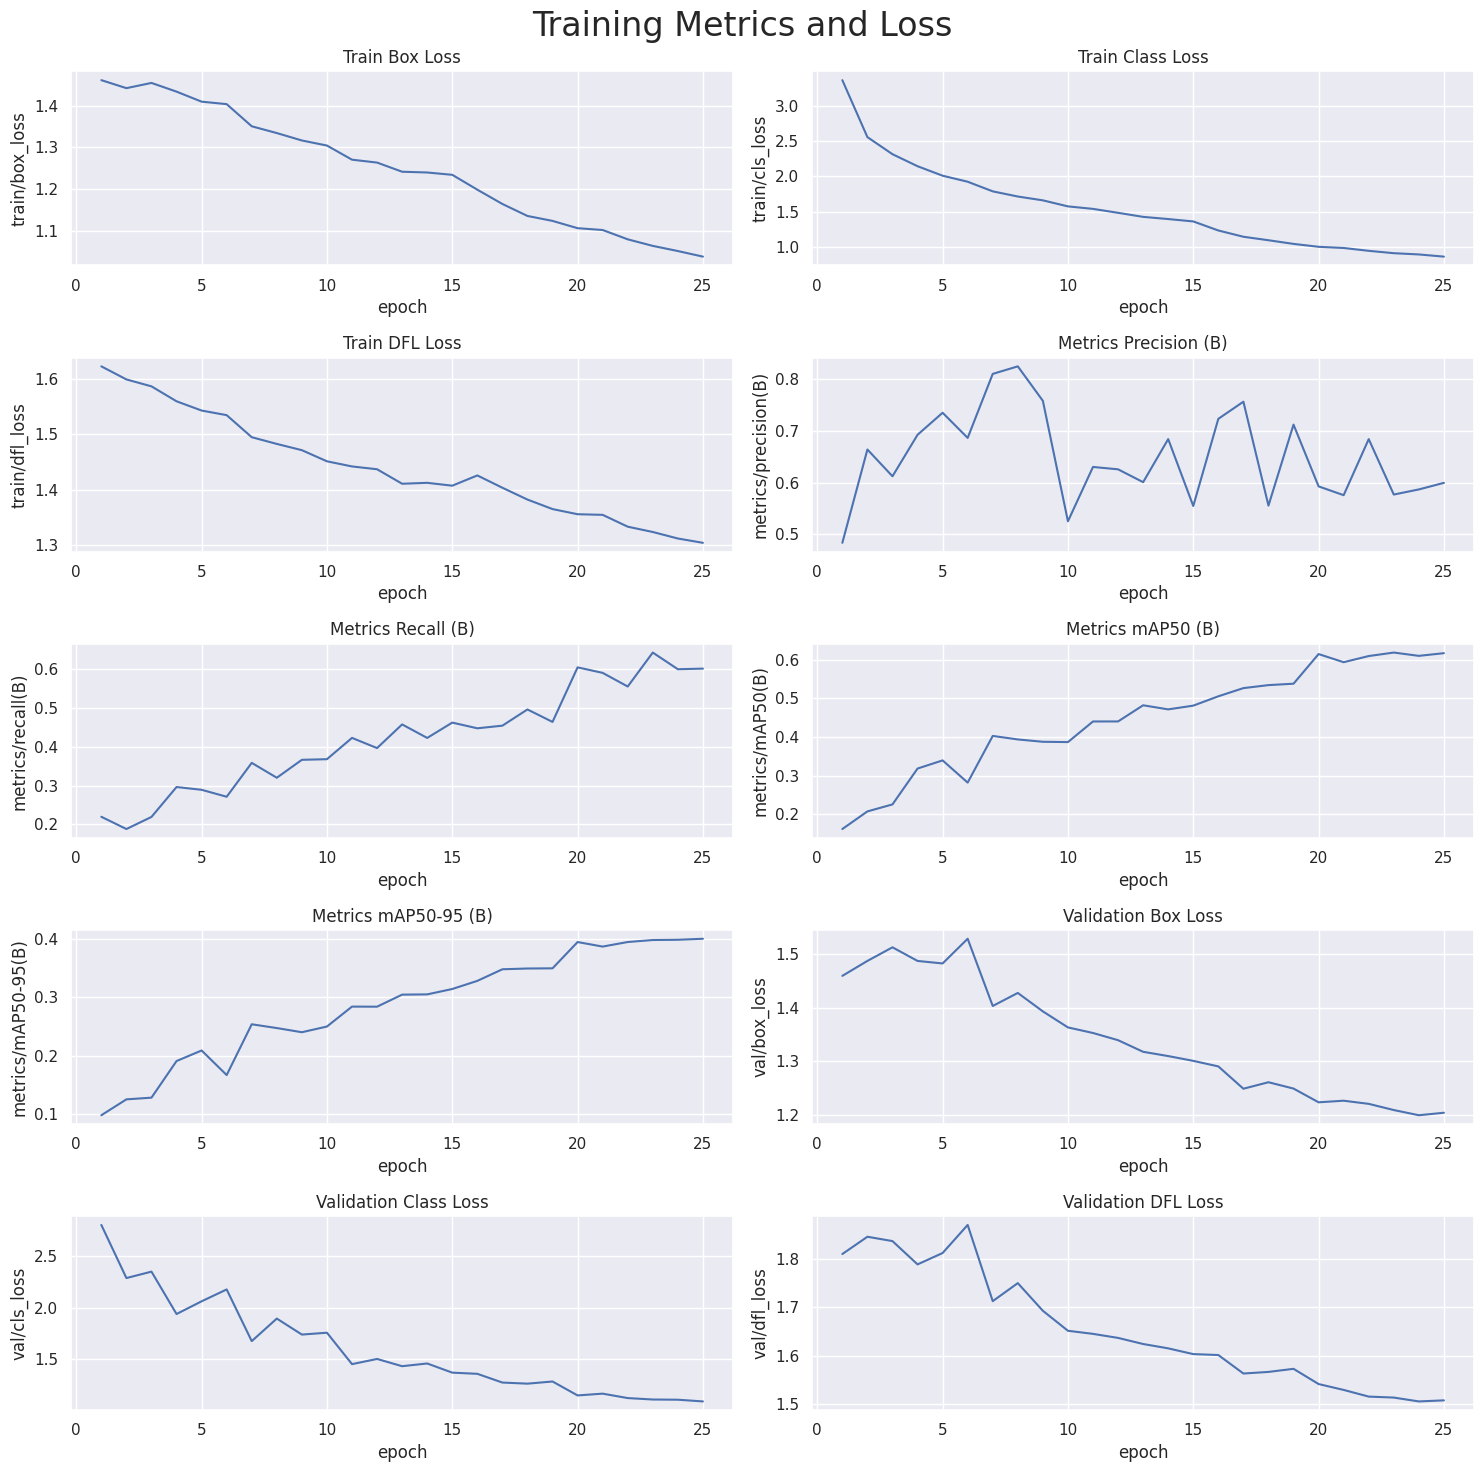

In [7]:
results.columns = results.columns.str.strip()
# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=results, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=results, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=results, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=results, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=results, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=results, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=results, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=results, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=results, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=results, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

# Evaluation of fine-tuned model

In [8]:
# Loading the best performing model
Valid_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

Ultralytics 8.3.58 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/labels... 501 images, 0 backgrounds, 0 corrupt: 100%|██████████| 501/501 [00:02<00:00, 184.38it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.63it/s]


                   all        501        966      0.602      0.709      0.679      0.423
                  Mask         33         37      0.852       0.73      0.848      0.645
                   can         13         19      0.544      0.526      0.448      0.211
             cellphone         40         46      0.906          1      0.994      0.853
           electronics         14         19      0.475      0.842      0.737       0.47
               gbottle         27         63      0.509      0.651      0.645      0.399
                 glove         23         34      0.894      0.748      0.806      0.635
                 metal          2          5      0.147        0.2      0.166     0.0802
                  misc         30         33      0.595       0.49      0.534      0.285
                   net         63         65      0.742      0.831      0.795      0.505
                  pbag        128        166      0.744      0.964       0.94      0.787
               pbottl

In [9]:
# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.6023953574739048
metrics/recall(B):  0.7093872277224719
metrics/mAP50(B):  0.6794435494174577
metrics/mAP50-95(B):  0.42305260321650195


# Visual inspection and use of fine-tund YOLOv8 first-hand


image 1/1 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/uwg_g-586_jpg.rf.4713512a7ec046e7b92b8cc249e27698.jpg: 640x640 1 pbag, 5.7ms
Speed: 2.7ms preprocess, 5.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


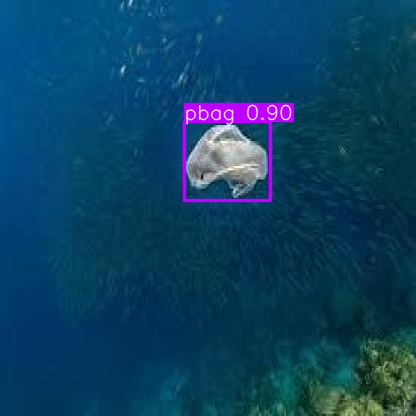


image 1/1 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/uwg_yt-67__flipv_jpg.rf.5116738243538b4e1bf78aaa4e7e8a5a.jpg: 640x640 1 gbottle, 5.6ms
Speed: 2.1ms preprocess, 5.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


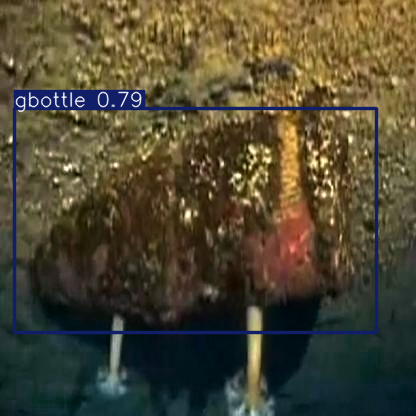


image 1/1 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/mask_in_the_ocean27_jpg.rf.b07f4e441e732918725cedb195537777.jpg: 640x640 1 Mask, 1 glove, 5.4ms
Speed: 2.2ms preprocess, 5.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


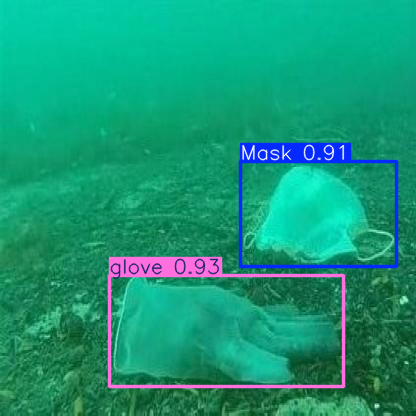


image 1/1 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/uwg_g-256__flipv_jpeg_jpg.rf.3ec4361dbaee73f6ecc417bfc687e4e1.jpg: 640x640 2 gbottles, 5.5ms
Speed: 2.1ms preprocess, 5.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


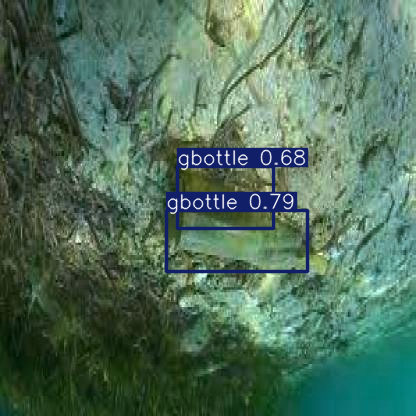


image 1/1 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/uwg_g-1204_jpg.rf.964e8c3cd8d52d79201bfd01bbcf4347.jpg: 640x640 4 tires, 5.5ms
Speed: 2.1ms preprocess, 5.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


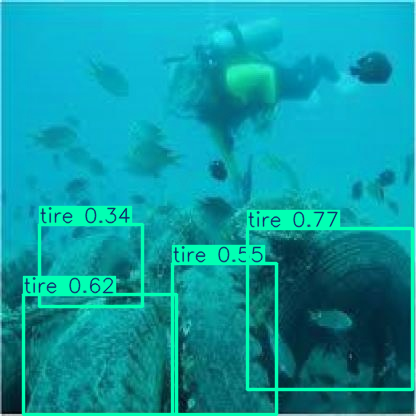

In [10]:
images = os.listdir("/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images")
for i in range(5):
    image = os.path.join("/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images", images[i])
    result_predict = Valid_model.predict(source = image, imgsz=(640), iou=0.4)

    # show results
    plot = result_predict[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(plot))